# Results

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import sys
import scipy.stats
import re
import os
import pandas as pd
import seaborn as sns

In [3]:
sys.path.append('../codes')

In [4]:
from VMSfunctions.Chemicals import *
from VMSfunctions.Chromatograms import *
from VMSfunctions.MassSpec import *
from VMSfunctions.Controller import *
from VMSfunctions.Common import *
from VMSfunctions.DataGenerator import *
from VMSfunctions.Noise import *

In [5]:
base_dir = 'C:\\Users\\joewa\\University of Glasgow\\Vinny Davies - CLDS Metabolomics Project\\'

In [6]:
# base_dir = 'C:\\Users\\Vinny\\OneDrive - University of Glasgow\\CLDS Metabolomics Project\\'

## B. Peak Picking (CentWave) Results

#### Load mzML in peak picking, and see if the same peaks are picked again.

#### Boxplot comparing the mz, rt and intensity distributions of simulated MS1 peaks vs those from some beer files.

In [7]:
df = pd.read_csv(os.path.join(base_dir, 'Manuscript\\B. CentWave\\mzML\\extracted_peaks_ms1.csv'))

In [8]:
min_ms1_intensity = 1.75E5
rt_range = [(3*60, 21*60)]
mz_range = [(0, 1050)]

In [9]:
intensity_col = 'maxo'
df = df[(df['rt'] > rt_range[0][0]) & (df['rt'] < rt_range[0][1])]
df = df[(df['rt'] > mz_range[0][0]) & (df['rt'] < mz_range[0][1])]
df = df[(df[intensity_col] > min_ms1_intensity)]
df['log_intensity'] = df.apply(lambda row: np.log(row[intensity_col]), axis=1)

In [10]:
df.head()

,mz,mzmin,mzmax,rt,rtmin,rtmax,into,intb,maxo,sn,sample,is_filled,msLevel,filename,log_intensity
175,144.927465,144.927368,144.927551,180.270,125.944,227.040,1.380150e+07,1.378399e+07,2.334051e+05,105,1,0,1,Beer_multibeers_1_fullscan1.mzML,12.360531
188,255.055099,255.054810,255.055389,182.986,157.797,223.123,5.723220e+06,5.631491e+06,1.915483e+05,32,1,0,1,Beer_multibeers_1_fullscan1.mzML,12.162895
200,128.953466,128.953430,128.953506,193.483,165.756,215.408,6.641639e+07,6.608331e+07,1.948148e+06,112,1,0,1,Beer_multibeers_1_fullscan1.mzML,14.482390
223,402.271539,402.271179,402.272064,204.018,198.778,212.928,1.719215e+06,1.719202e+06,2.516077e+05,251607,1,0,1,Beer_multibeers_1_fullscan1.mzML,12.435626
238,321.196281,321.196045,321.196533,210.280,204.018,215.408,1.868589e+06,1.867575e+06,3.243222e+05,215,1,0,1,Beer_multibeers_1_fullscan1.mzML,12.689493


In [11]:
def make_boxplot(df, x, y, xticklabels, title):
    g = sns.catplot(x=x, y=y,  kind='box', data=df)
    if xticklabels is not None:
        g.set_xticklabels(xticklabels, rotation=90)
    else:
        g.set_xticklabels(rotation=90)        
    plt.title(title)
    plt.tight_layout()
    plt.show()

In [12]:
def make_hist(df, col_name, file_name, title):
    gb = df.groupby('filename')
    group_df = gb.get_group(file_name)
    vals = group_df[col_name].values
    print(vals, len(vals))
    _ = plt.hist(vals, bins=100)
    plt.title(title)
    plt.tight_layout()
    plt.show()

Plot MS1 features

In [13]:
df.groupby('filename').count()

,mz,mzmin,mzmax,rt,rtmin,rtmax,into,intb,maxo,sn,sample,is_filled,msLevel,log_intensity
filename,,,,,,,,,,,,,,
Beer_multibeers_12_fullscan1.mzML,1257,1257,1257,1257,1257,1257,1257,1257,1257,1257,1257,1257,1257,1257
Beer_multibeers_18_fullscan1.mzML,7967,7967,7967,7967,7967,7967,7967,7967,7967,7967,7967,7967,7967,7967
Beer_multibeers_1_fullscan1.mzML,6808,6808,6808,6808,6808,6808,6808,6808,6808,6808,6808,6808,6808,6808
Beer_multibeers_6_fullscan1.mzML,7025,7025,7025,7025,7025,7025,7025,7025,7025,7025,7025,7025,7025,7025
no_noise_ms1_controller.mzML,4021,4021,4021,4021,4021,4021,4021,4021,4021,4021,4021,4021,4021,4021
noisy_ms1_controller.mzML,5891,5891,5891,5891,5891,5891,5891,5891,5891,5891,5891,5891,5891,5891


In [14]:
df.groupby('filename').median()

,mz,mzmin,mzmax,rt,rtmin,rtmax,into,intb,maxo,sn,sample,is_filled,msLevel,log_intensity
filename,,,,,,,,,,,,,,
Beer_multibeers_12_fullscan1.mzML,234.076885,234.076813,234.076950,717.640000,709.865000,723.949000,5.052289e+06,4.848250e+06,466060.03125,75,2,0,1,13.052070
Beer_multibeers_18_fullscan1.mzML,266.138415,266.138275,266.138580,426.950000,422.009000,433.306000,5.164055e+06,5.062477e+06,599715.81250,45,3,0,1,13.304211
Beer_multibeers_1_fullscan1.mzML,252.108323,252.108170,252.108551,494.115000,484.110000,502.911000,5.009870e+06,4.880431e+06,533100.90625,42,1,0,1,13.186466
Beer_multibeers_6_fullscan1.mzML,273.134278,273.134247,273.134308,448.264000,439.400000,461.135000,4.285033e+06,4.196025e+06,457976.18750,44,4,0,1,13.034572
no_noise_ms1_controller.mzML,212.025382,212.025208,212.025681,517.690683,509.944952,525.295451,5.365102e+06,5.365092e+06,607018.25000,599318,5,0,1,13.316314
noisy_ms1_controller.mzML,220.141079,220.141022,220.141159,542.834460,533.663303,550.344807,4.091254e+06,4.091230e+06,441307.87500,430317,6,0,1,12.997498


[ 180.27   182.986  193.483 ...  916.207 1020.82   809.581] 6808


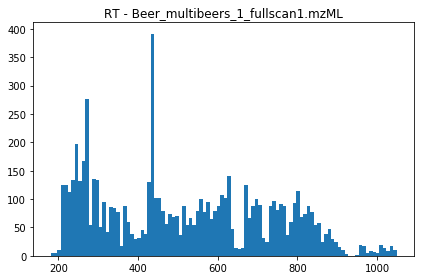

[ 185.44028791  186.68194243  189.32581501 ... 1039.02755687 1032.53377894
 1048.2977746 ] 4021


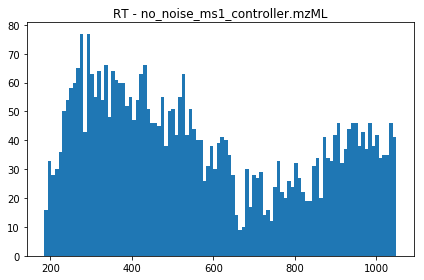

[ 186.27474581  188.8125202   186.27474581 ...  873.87607496 1010.90974286
  987.52257349] 5891


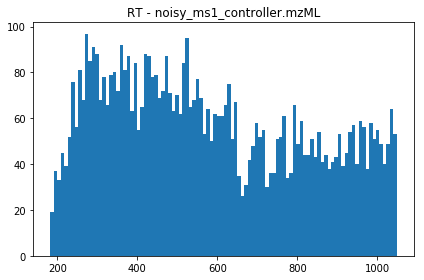

In [15]:
fname = 'Beer_multibeers_1_fullscan1.mzML'
make_hist(df, 'rt', fname, 'RT - %s' % fname)

fname = 'no_noise_ms1_controller.mzML'
make_hist(df, 'rt', fname, 'RT - %s' % fname)

fname = 'noisy_ms1_controller.mzML'
make_hist(df, 'rt', fname, 'RT - %s' % fname)

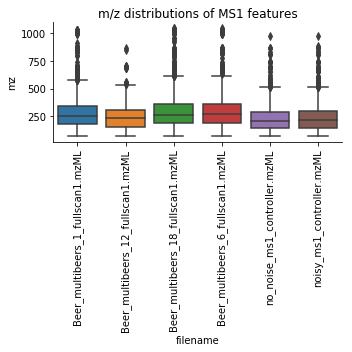

In [16]:
make_boxplot(df, 'filename', 'mz', None, 
             'm/z distributions of MS1 features')

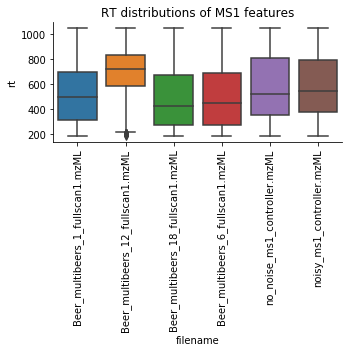

In [17]:
make_boxplot(df, 'filename', 'rt', None, 
             'RT distributions of MS1 features')

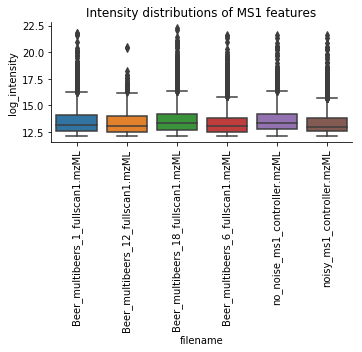

In [18]:
make_boxplot(df, 'filename', 'log_intensity', None, 
             'Intensity distributions of MS1 features')

## C. Top-N DDA Fragmentation Compared to the Real Data

Plot chromatograms

In [19]:
base_dir = 'C:\\Users\\joewa\\Work\\git\\clms\\Simulator'
dataset = load_obj(os.path.join(base_dir, 'models\\dda_results\\dataset.p'))
noisy_dataset = load_obj(os.path.join(base_dir, 'models\\dda_results\\noisy_dataset.p'))

In [20]:
min_intensity = 1.75E5
positives = list(filter(lambda x: x.type == 'data' and x.max_intensity > min_intensity, noisy_dataset))
negatives = list(filter(lambda x: x.type == 'noise'and x.max_intensity > min_intensity, noisy_dataset))

In [21]:
len(positives), len(negatives)

(7077, 2565)

0 / 2565
1000 / 2565
2000 / 2565
0 / 7077
1000 / 7077
2000 / 7077
3000 / 7077
4000 / 7077
5000 / 7077
6000 / 7077
7000 / 7077


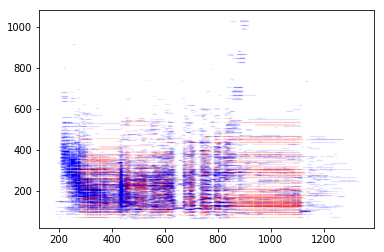

In [22]:
plt.figure()

for i in range(len(negatives)):
    chem = negatives[i]
    X = chem.chromatogram.raw_rts
    Y = chem.chromatogram.raw_mzs
    plt.scatter(X, Y, c='r', s=0.1, alpha=0.05)
    if i % 1000 == 0:
        print(i, '/', len(negatives))

for i in range(len(positives)):
    chem = positives[i]
    X = chem.chromatogram.raw_rts
    Y = chem.chromatogram.raw_mzs
    plt.scatter(X, Y, c='b', s=0.1, alpha=0.05)
    if i % 1000 == 0:
        print(i, '/', len(positives))

We want to compare the DDA results (T10) against real data.
- Boxplot comparing the mz, rt and intensity distributions of simulated MS1 peaks vs those from beer1pos T10.

In [26]:
base_dir = 'C:\\Users\\joewa\\University of Glasgow\\Vinny Davies - CLDS Metabolomics Project'

In [27]:
df = pd.read_csv(os.path.join(base_dir, 'Manuscript\\C. Top-N DDA Fragmentation Compared to the Real Data\\mzML\\extracted_peaks_ms1.csv'))

In [29]:
min_ms1_intensity = 1.75E5
rt_range = [(3*60, 21*60)]
mz_range = [(0, 1050)]

In [30]:
intensity_col = 'maxo'
df = df[(df['rt'] > rt_range[0][0]) & (df['rt'] < rt_range[0][1])]
df = df[(df['rt'] > mz_range[0][0]) & (df['rt'] < mz_range[0][1])]
df = df[(df[intensity_col] > min_ms1_intensity)]
df['log_intensity'] = df.apply(lambda row: np.log(row[intensity_col]), axis=1)

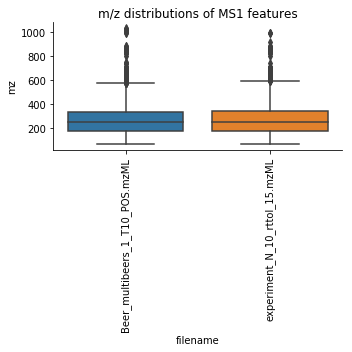

In [31]:
make_boxplot(df, 'filename', 'mz', None, 
             'm/z distributions of MS1 features')

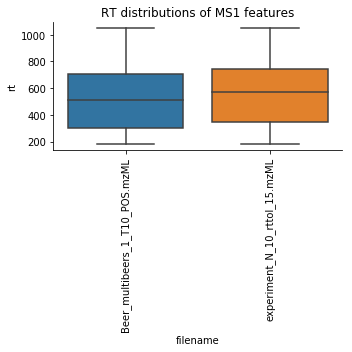

In [32]:
make_boxplot(df, 'filename', 'rt', None, 
             'RT distributions of MS1 features')

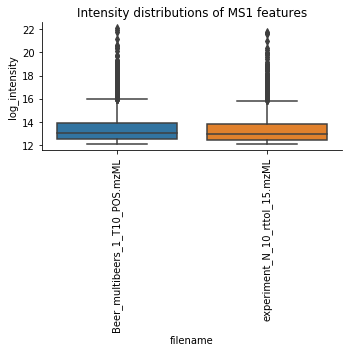

In [33]:
make_boxplot(df, 'filename', 'log_intensity', None, 
             'Intensity distributions of MS1 features')

- Peak picking results:
    - How many chemicals are detected as MS1 peaks by XCMS?

In [34]:
filename = 'experiment_N_10_rttol_15.mzML'
filtered_df = df.loc[df['filename'] == filename]
filtered_df.shape

(4924, 15)

In [35]:
def f(peak_mz, chrom_mzs):
    peak_mz = peak_mz - PROTON_MASS
    chrom_mzs = chrom_mzs - PROTON_MASS
    return peak_mz, chrom_mzs

In [36]:
detected_chemicals = []
for index, row in filtered_df.iterrows():
    mz = row['mz'] - PROTON_MASS
    rt = row['rt']
    max_intensity = row['maxo']
    chrom = None
    chem = UnknownChemical(mz, rt, max_intensity, chrom, children=None)
    detected_chemicals.append(chem)
    
len(detected_chemicals)

4924

In [37]:
def load_controller(results_dir, N, rt_tol):
    analysis_name = 'experiment_N_%d_rttol_%d' % (N, rt_tol)    
    pickle_in = '%s/%s.p' % (results_dir, analysis_name) 
    print('Loading %s' % analysis_name)                    
    try:
        controller = load_obj(pickle_in)
    except FileNotFoundError:
        controller = None
    return controller

In [38]:
def find_chem(to_find, chem_list, mz_tol, rt_tol, intensity_tol):
    for chem in chem_list:
        chem_mz = chem.isotopes[0][0]
        chem_mz_range = (chem_mz * (1-mz_tol/1e6), chem_mz * (1+mz_tol/1e6))
        chem_rt_range = (chem.rt - rt_tol, chem.rt + rt_tol)
        chem_intensity_range = (chem.max_intensity - intensity_tol, chem.max_intensity + intensity_tol)
        to_find_mz = to_find.isotopes[0][0]
        if (chem_mz_range[0] < to_find_mz < chem_mz_range[1]) and \
            (chem_rt_range[0] < to_find.rt < chem_rt_range[1] and \
            (chem_intensity_range[0] < to_find.max_intensity < chem_intensity_range[1])):
            return chem
    return None

In [43]:
N = 10
rt_tol = 15
results_dir = os.path.join(base_dir, 'Manuscript\\C. Top-N DDA Fragmentation Compared to the Real Data')
controller = load_controller(results_dir, N, rt_tol)

Loading experiment_N_10_rttol_15


In [45]:
dataset = load_obj(os.path.join(results_dir, 'noisy_dataset.p'))
positives = list(filter(lambda x: x.type == 'data', dataset))
negatives = list(filter(lambda x: x.type == 'noise', dataset))
print(len(dataset), len(positives), len(negatives))

27377 9828 17549


In [46]:
mz_tol = 10
rt_tol = 30
intensity_tol = 1e5
count_found = defaultdict(int)
for i in range(len(dataset)):
    chem = dataset[i]
    if i % 1000 == 0:
        print(i, '/', len(dataset), dict(count_found))
    found = find_chem(chem, detected_chemicals, mz_tol, rt_tol, intensity_tol)
    if found:
        chem.found = True
        count_found[chem.type] += 1
    else:
        chem.found = False

0 / 27377 {}
1000 / 27377 {'data': 195}
2000 / 27377 {'data': 604}
3000 / 27377 {'data': 1057}
4000 / 27377 {'data': 1581}
5000 / 27377 {'data': 2097}
6000 / 27377 {'data': 2592}
7000 / 27377 {'data': 2999}
8000 / 27377 {'data': 3208}
9000 / 27377 {'data': 3261}
10000 / 27377 {'data': 3266}
11000 / 27377 {'data': 3266, 'noise': 7}
12000 / 27377 {'data': 3266, 'noise': 35}
13000 / 27377 {'data': 3266, 'noise': 67}
14000 / 27377 {'data': 3266, 'noise': 67}
15000 / 27377 {'data': 3266, 'noise': 71}
16000 / 27377 {'data': 3266, 'noise': 92}
17000 / 27377 {'data': 3266, 'noise': 111}
18000 / 27377 {'data': 3266, 'noise': 114}
19000 / 27377 {'data': 3266, 'noise': 166}
20000 / 27377 {'data': 3266, 'noise': 189}
21000 / 27377 {'data': 3266, 'noise': 238}
22000 / 27377 {'data': 3266, 'noise': 307}
23000 / 27377 {'data': 3266, 'noise': 434}
24000 / 27377 {'data': 3266, 'noise': 514}
25000 / 27377 {'data': 3266, 'noise': 644}
26000 / 27377 {'data': 3266, 'noise': 851}
27000 / 27377 {'data': 3266

In [54]:
count_found

defaultdict(int, {'data': 3266, 'noise': 1110})

In [61]:
1110/17549

0.06325146732007522

- Compute:
    - Proportion of the original MS1 peaks that were fragmented
    - Number of MS2 peaks that map to the original MS1 peak
    - Show the fragmentation event plot in ToppView of real vs simulated data.

In [47]:
def count_fragmented(chem, fragmented_chems):
    peaks = fragmented_chems[chem]
    ms_counts = defaultdict(int)
    for p in peaks:
        ms_counts[p.ms_level] += 1
    return ms_counts

In [48]:
def find_chem(to_find, chem_list):
    for chem in chem_list:
        assert chem is not None
        assert to_find is not None
        if chem.max_intensity == to_find.max_intensity and \
            chem.rt == to_find.rt and \
            chem.chromatogram == to_find.chromatogram:
            return chem
    return None

In [49]:
def get_frag_events(controller, ms_level):
    filtered_frag_events = list(filter(lambda x: x.ms_level == ms_level, controller.mass_spec.fragmentation_events))
    chem_to_frag_events = defaultdict(list)
    for frag_event in filtered_frag_events:
        chem_to_frag_events[frag_event.chem].append(frag_event)
    return dict(chem_to_frag_events)

def count_frag_events(chem, chem_to_frag_events):
    return len(chem_to_frag_events[chem])

def get_chem_frag_counts(chem_list, chem_to_frag_events):
    results = {}
    for i in range(len(chem_list)):
        chem = chem_list[i]
        found = find_chem(chem, chem_to_frag_events)
        try:
            count = count_frag_events(found, chem_to_frag_events)
        except KeyError:
            count = 0
        results[chem] = count
    return results

In [50]:
positives_found = list(filter(lambda x: x.found, positives))
negatives_found = list(filter(lambda x: x.found, negatives))

In [51]:
len(positives_found), len(negatives_found)

(3266, 1110)

In [52]:
ms_level = 2
chem_to_frag_events = get_frag_events(controller, ms_level)
positives_fragmented_count = get_chem_frag_counts(positives, chem_to_frag_events)
negatives_fragmented_count = get_chem_frag_counts(negatives, chem_to_frag_events)    

In [53]:
frag_positives = [chem for chem in positives_fragmented_count if positives_fragmented_count[chem] > 0]
frag_negatives = [chem for chem in negatives_fragmented_count if negatives_fragmented_count[chem] > 0]
len(frag_positives), len(frag_positives)/len(positives_fragmented_count), len(frag_negatives), len(frag_negatives)/len(negatives_fragmented_count)

(5118, 0.5207570207570208, 3996, 0.22770528235227078)

In [57]:
5118 + 3996

9114

In [58]:
positives_found_fragmented_count = get_chem_frag_counts(positives_found, chem_to_frag_events)
negatives_found_fragmented_count = get_chem_frag_counts(negatives_found, chem_to_frag_events)    

In [59]:
frag_positives = [chem for chem in positives_found_fragmented_count if positives_found_fragmented_count[chem] > 0]
frag_negatives = [chem for chem in negatives_found_fragmented_count if negatives_found_fragmented_count[chem] > 0]
len(frag_positives), len(frag_positives)/len(positives_fragmented_count), len(frag_negatives), len(frag_negatives)/len(negatives_fragmented_count)

(1890, 0.19230769230769232, 499, 0.02843466864208787)

In [62]:
1890 + 499

2389

## D. Case Study 1: Varying N in top-N DDA fragmentation

Vary N from 2 … 100, and see what happens.
Hypotheses, as N increases:
- Precision should decrease then flattens
- Recall should increase then flattens
- Number of MS1 peaks detected by CentWave should decrease

Let ground truth peaks = chemicals detected as MS1 peaks by XCMS, then
- Positives: chemicals detected as MS1 peaks by XCMS
- Negatives: chemicals not detected as MS1 peaks by XCMS

Precision and recall are calculated as follows:
- True positives = is positive and is fragmented
- False positives = is negative and is fragmented
- False negatives = is positive but is not fragmented
- Prec = tp / (tp + fp)
- Rec = tp / (tp + fn)
- f1 = ( 2 * prec * rec) / (prec + rec)

Try to put the real T10 data on the plot.

Compute how close we fragment to the top of the chromatographic peak.

Varying Ns and dynamic exclusion windows

In [ ]:
df = pd.read_csv(os.path.join(base_dir, 'Manuscript\\D. Case Study 1 Varying N in top-N DDA fragmentation\\mzML\\extracted_peaks_ms1.csv'))

In [ ]:
df.head()

In [ ]:
df['log_intensity'] = df.apply(lambda row: np.log(row['into']), axis=1)

In [ ]:
def make_boxplot(df, x, y, xticklabels, title):
    plt.gcf().set_size_inches(15, 5)
    g = sns.catplot(x=x, y=y,  kind='box', data=df)
    if xticklabels is not None:
        g.set_xticklabels(xticklabels, rotation=90)
    else:
        g.set_xticklabels(rotation=90)        
    plt.title(title)
    plt.tight_layout()

In [ ]:
make_boxplot(df, 'filename', 'mz', None, 
             'mz distributions of MS1 features detected by CentWave')

make_boxplot(df, 'filename', 'rt', None, 
             'rt distributions of MS1 features detected by CentWave')

make_boxplot(df, 'filename', 'log_intensity', None, 
             'Intensity distributions of MS1 features detected by CentWave')

In [ ]:
count_df = df.groupby('filename').size().reset_index(name='counts')

In [ ]:
# count_df['N'] = df.apply(lambda row: row.values, axis=1)

In [ ]:
arrays = []
for arr in count_df.values:
    N = arr[0].split('_')[2]
    arrays.append((arr[0], N, arr[1]))
arrays = np.array(arrays)

In [ ]:
df = pd.DataFrame(arrays, columns=['filename', 'N', 'count'])

In [ ]:
df['N'] = df['N'].apply(int)
df['count'] = df['count'].apply(int)

In [ ]:
df = df.sort_values('N')

In [ ]:
df.head()

In [ ]:
sns.lineplot(x='N', y='count', data=df)
plt.title('Number of MS1 features detected by CentWave')

## E. Case Study 2: Reproduce DIA results

![title](img/placeholder.png)

## F. Case Study 3: Reproduce DsDA results

Same as Table 1 in the DsDA paper:
- The percentage of all detected features that were sampled by MS/MS at least once.
- The percentage of all features detected in at least 20% of the injections that were sampled by MS/MS at least once.
- The total number of MS/MS events (absolute counts) that map to a feature

![title](img/capture1.png)

Same as Figure 1 in the DsDA paper:
- Create 20 samples, run them through DsDA with or without maxdepth.
- Figure 1. *Complex small-molecule sample injected 20 times using standard DDA (A), DsDA (B), or DsDA with the MaxDepth option enabled (C). Each panel contains a scatterplot in which each point represents an XCMS feature. All black points are plotted with sizes proportional to the number of times they were sampled for MS/MS (see legend). All points colored red remained unsampled at the end of the 20-injection sequence*

![title](img/capture2.png)